# <p align='center'><u><b> Procesamiendo de datos - Perfil </b></u></p>

Para realizar la caracterización del perfil se dispuso medir la distancia que hay entre un plano ubicado encima del plano de la tela sin deformar y la deformación de la tela, como se ve en la siguiente imagen. [Ver imagen](../Montaje%20experimental/2025-04-02/Imagen%20de%20WhatsApp%202025-04-02%20a%20las%2018.26.51_618fb84e.jpg)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 

In [8]:
url = '2025-04-02 Mediciones del perfil.xlsx'
df = pd.read_excel(url)

'''
Las columnas 'y_i' son las distancias medidas que hay desde un plano ubicado por encima del plano de la tela sin deformar y la deformación de la tela,
La columna 'y' corresponde al promedio de mediciones
La columna 'sigma' es la desviación estándar del promedio
La columna 'w' es la deformación vertical de la tela medida desde el punto más bajo de la deformación

La distancia entre el plano de referencia y el plano de la tela sin deformar es son 17.5 cm
'''

df['y'] = df[['y1', 'y2', 'y3']].mean(axis=1)
df['sigma'] = df[['y1', 'y2', 'y3']].std(axis=1, ddof=1) / np.sqrt(3)
df['w'] = df['y'] - 17.5

df.to_excel(url, index=False) # Sobreescribir los nuevos valores en el mismo excel

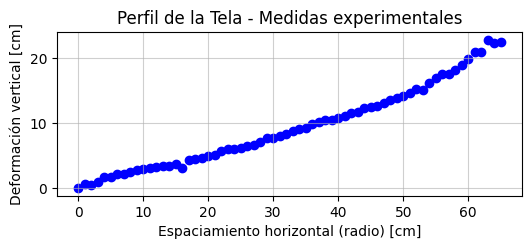

In [ ]:
x = df['r']
y = df['w']  
error = df['sigma']

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.scatter(x, y, label="Mediciones", color='b')
ax.set_xlabel('Espaciamiento horizontal (radio) [cm]')
ax.set_ylabel('Deformación vertical [cm]')
ax.set_title('Perfil de la Tela - Medidas experimentales')
ax.grid(True, linestyle='-', alpha=0.6)
plt.savefig("Perfil de la Tela - Medidas experimentales", dpi=300, bbox_inches='tight') # Se guarda en esta carpeta, pero la moveré a '2025-04-02 de Montaje Experimental'
plt.show()
